In [1]:
import warnings
warnings.filterwarnings('ignore')

# Model fitting for External Compton 

## Loading data

In [2]:
from jetset.jet_model import Jet
from jetset.data_loader import Data,ObsData
from jetset.test_data_helper import  test_SEDs
test_SEDs


['/Users/orion/anaconda3/envs/jetset/lib/python3.7/site-packages/jetset-1.1.2-py3.7-macosx-10.9-x86_64.egg/jetset/test_data/SEDs_data/SED_3C345.ecsv',
 '/Users/orion/anaconda3/envs/jetset/lib/python3.7/site-packages/jetset-1.1.2-py3.7-macosx-10.9-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk421_EBL_DEABS.ecsv',
 '/Users/orion/anaconda3/envs/jetset/lib/python3.7/site-packages/jetset-1.1.2-py3.7-macosx-10.9-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk501_EBL_DEABS.ecsv']

In [3]:
data=Data.from_file(test_SEDs[0])


In [4]:
sed_data=ObsData(data_table=data)

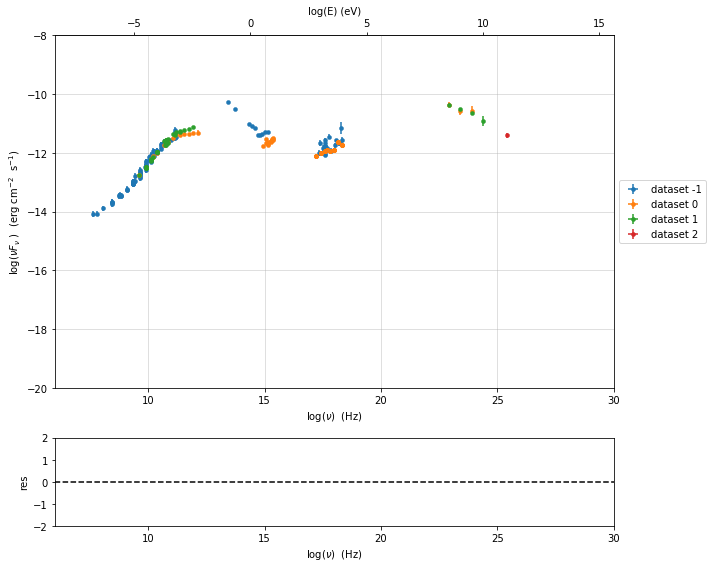

In [5]:
%matplotlib inline
p=sed_data.plot_sed(show_dataset=True)

we filter out the data set `-1` 

current datasets
dataset -1
dataset 0
dataset 1
dataset 2
---> excluding  data_set/s ['-1']
filter -1 192
current datasets
dataset 0
dataset 1
dataset 2
---> data sets left after filtering None
---> data len after filtering=192
current datasets
dataset 0
dataset 1
dataset 2


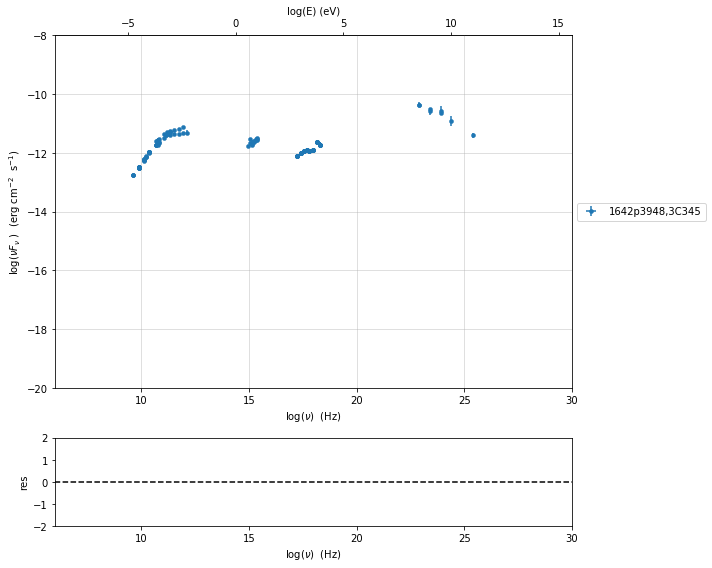

In [6]:
sed_data.show_data_sets()
sed_data.filter_data_set('-1',exclude=True)
sed_data.show_data_sets()
p=sed_data.plot_sed()



***  binning data  ***
---> N bins= 80
---> bin_widht= 0.2



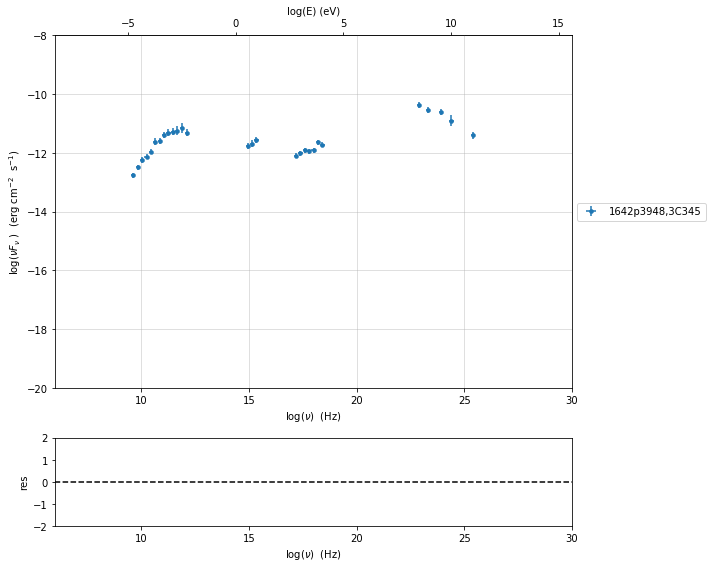

In [7]:
sed_data.group_data(bin_width=.2)
sed_data.add_systematics(0.2,[10.**6,10.**29])
p=sed_data.plot_sed()

## Phenomenological model constraining


*** evaluating spectral indices for data ***



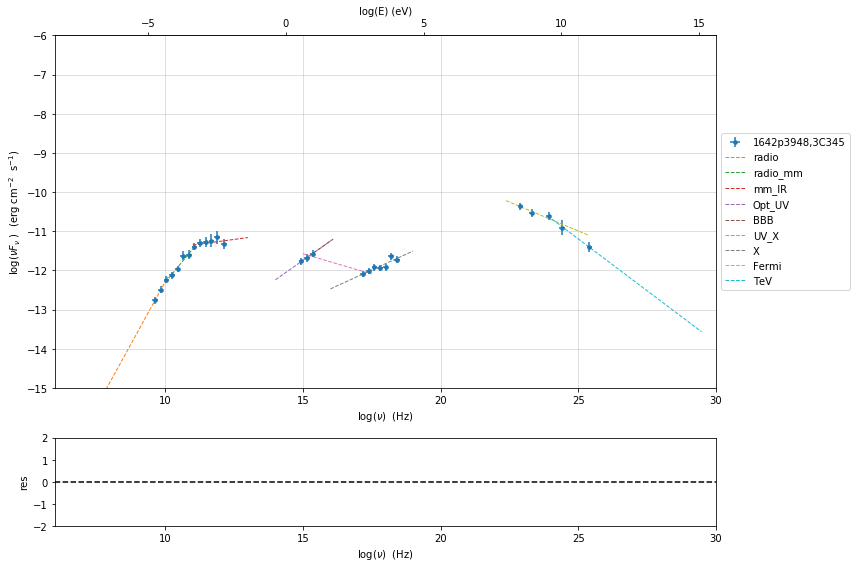

In [8]:
from jetset.sed_shaper import  SEDShape
my_shape=SEDShape(sed_data)
my_shape.eval_indices(silent=True)
p=my_shape.plot_indices()
p.rescale(y_min=-15,y_max=-6)

for the synchrotron sed_shaping we include the check for Big Blue Bump (BBB) component. Moreover, we force the model to use a pure log-parabolic function and not a log-cubic one in order to get a better estimation of the BBB  component. The fit values of the BBB component will be used in the `ObsConstrain` to guess the accretion disk luminosity and temperature

In [9]:
mm,best_fit=my_shape.sync_fit(check_BBB_template=True,
                              check_host_gal_template=False,
                              use_log_par=True,
                              Ep_start=None,
                              minimizer='lsb',
                              silent=True,
                              fit_range=[9,16])


*** Log-Polynomial fitting of the synchrotron component ***
---> first blind fit run,  fit range: [9, 16]
--> class:  LSP

--> class:  LSPn calls=120, chisq=11.539386 UL part=-0.000000


  model name      name     bestfit val     err +     err -   start val   fit range min fit range max frozen
------------- ----------- ------------- ------------ ----- ------------- ------------- ------------- ------
LogParabolaEp           b -2.984653e-01 5.631621e-02    -- -1.527892e-01 -1.000000e+01  0.000000e+00  False
LogParabolaEp          Ep  1.190850e+01 2.238812e-01    --  1.298338e+01  0.000000e+00  3.000000e+01  False
LogParabolaEp          Sp -1.123366e+01 7.306309e-02    -- -1.095506e+01 -3.000000e+01  0.000000e+00  False
          BBB nuFnu_p_BBB -1.155965e+01 6.791049e-02    -- -1.095506e+01 -1.295506e+01 -8.955061e+00  False
          BBB    nu_scale  7.058302e-02 2.539001e-03    --  0.000000e+00 -5.000000e-01  5.000000e-01  False
---> sync       nu_p=+1.190850e+01 (err=+2.238812e-01)  


*** Log-Polynomial fitting of the IC component ***
---> fit range: [16, 26]
---> LogCubic fit


model name name  bestfit val     err +     err -   start val   fit range min fit range max frozen
---------- ---- ------------- ------------ ----- ------------- ------------- ------------- ------
  LogCubic    b -1.127307e-01 1.237406e-02    -- -1.000000e+00 -1.000000e+01  0.000000e+00  False
  LogCubic    c -1.061377e-02 2.388611e-03    -- -1.000000e+00 -1.000000e+01  1.000000e+01  False
  LogCubic   Ep  2.273133e+01 1.451687e-01    --  2.270678e+01  0.000000e+00  3.000000e+01  False
  LogCubic   Sp -1.043074e+01 6.087740e-02    -- -1.000000e+01 -3.000000e+01  0.000000e+00  False
---> IC         nu_p=+2.273133e+01 (err=+1.451687e-01)  nuFnu_p=-1.043074e+01 (err=+6.087740e-02) curv.=-1.127307e-01 (err=+1.237406e-02)



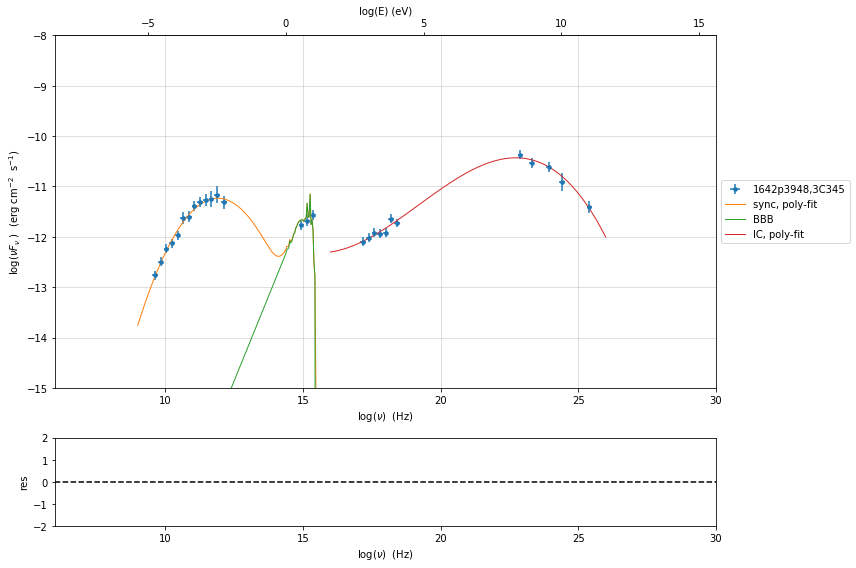

In [10]:
my_shape.IC_fit(fit_range=[16,26],minimizer='minuit', silent=True)
p=my_shape.plot_shape_fit()
p.rescale(y_min=-15)

In this case we use the `constrain_SSC_EC_model`, and we ask to use a dusty torus and BLR component external component

In [11]:
from jetset.obs_constrain import ObsConstrain
from jetset.model_manager import  FitModel
from jetset.minimizer import fit_SED
sed_obspar=ObsConstrain(beaming=25,
                        B_range=[0.1,0.2],
                        distr_e='bkn',
                        t_var_sec=7*86400,
                        nu_cut_IR=1E9,
                        SEDShape=my_shape)


prefit_jet=sed_obspar.constrain_SSC_EC_model(electron_distribution_log_values=False,EC_componets_list=['EC_DT','EC_BLR'],R_H=1E18,silent=True)



***  constrains parameters from observable ***

---> set s1 to 3.500000
    name          par type           units          val      phys. bound. min phys. bound. max  log  frozen
----------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
       gmin  low-energy-cut-off lorentz-factor* 1.214476e+01     1.000000e+00     1.000000e+09 False  False
       gmax high-energy-cut-off lorentz-factor* 1.209849e+04     1.000000e+00     1.000000e+15 False  False
          N    emitters_density         1 / cm3 2.039857e+02     0.000000e+00               -- False  False
          p   LE_spectral_slope                 2.355053e+00    -1.000000e+01     1.000000e+01 False  False
        p_1   HE_spectral_slope                 3.500000e+00    -1.000000e+01     1.000000e+01 False  False
gamma_break    turn-over-energy lorentz-factor* 3.456517e+02     1.000000e+00     1.000000e+09 False  False
          R         region_size              cm 1.384330e+17   

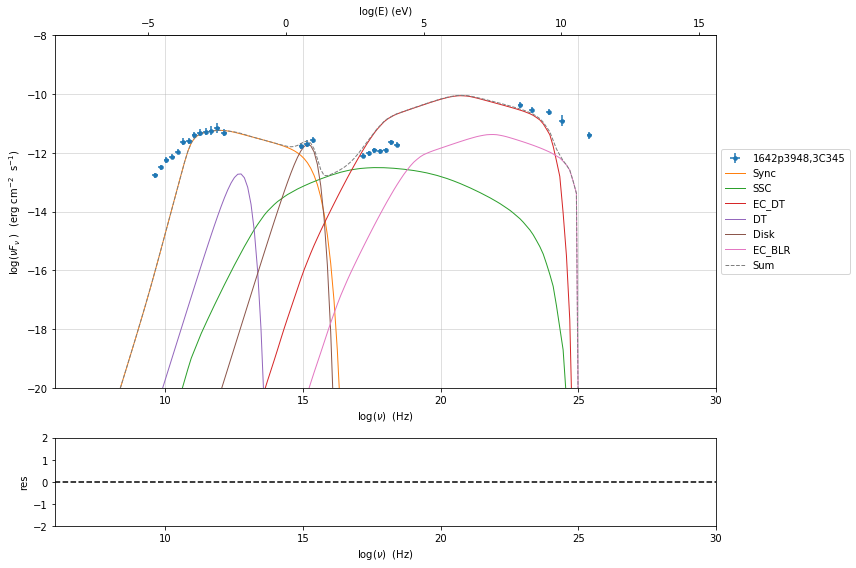

In [12]:
prefit_jet.eval()
p=prefit_jet.plot_model(sed_data=sed_data)
prefit_jet.save_model('prefit_jet_EC.pkl')

The prefit model should works well for the synchrotron component, but the EC one is a bit problematic. We can set as starting values  a slightly hader value of `p`, and a larger value of `gamma_break` and `gmax`. We freeze some parameters, and we also set some `fit_range` values, indeed `minuit` works better if `fit_range` is set for some parameters that might impact significantly on the fit.

## EC model fit

In [18]:
jet_minuti=Jet.load_model('prefit_jet_EC.pkl')
jet_minuti.set_gamma_grid_size(100)
fit_model_minuit=FitModel( jet=jet_minuti, name='EC-best-fit-lsb')
fit_model_minuit.show_model_components()

    name          par type           units          val      phys. bound. min phys. bound. max  log  frozen
----------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
       gmin  low-energy-cut-off lorentz-factor* 1.214476e+01     1.000000e+00     1.000000e+09 False  False
       gmax high-energy-cut-off lorentz-factor* 1.209849e+04     1.000000e+00     1.000000e+15 False  False
          N    emitters_density         1 / cm3 2.039857e+02     0.000000e+00               -- False  False
          p   LE_spectral_slope                 2.355053e+00    -1.000000e+01     1.000000e+01 False  False
        p_1   HE_spectral_slope                 3.500000e+00    -1.000000e+01     1.000000e+01 False  False
gamma_break    turn-over-energy lorentz-factor* 3.456517e+02     1.000000e+00     1.000000e+09 False  False
       T_DT                  DT               K 1.000000e+02     0.000000e+00               -- False  False
       R_DT                 

In [19]:
jet_minuti=Jet.load_model('prefit_jet_EC.pkl')
jet_minuti.set_gamma_grid_size(100)
fit_model_minuit=FitModel( jet=jet_minuti, name='EC-best-fit-lsb')
fit_model_minuit.freeze('jet_leptonic','z_cosm')
fit_model_minuit.freeze('jet_leptonic','R_H')
fit_model_minuit.freeze('jet_leptonic','L_Disk')
fit_model_minuit.freeze('jet_leptonic','R_DT')
fit_model_minuit.freeze('jet_leptonic','R_BLR_in')
fit_model_minuit.freeze('jet_leptonic','R_BLR_out')

fit_model_minuit.jet_leptonic.parameters.R.fit_range=[1E16,5E18]
fit_model_minuit.jet_leptonic.parameters.gamma_break.val=600
fit_model_minuit.jet_leptonic.parameters.p.val=1.8
fit_model_minuit.jet_leptonic.parameters.gamma_break.fit_range=[100,3000]
fit_model_minuit.jet_leptonic.parameters.gmin.fit_range=[2,10]

fit_model_minuit.jet_leptonic.parameters.gmax.val=1E5
fit_model_minuit.jet_leptonic.parameters.gmax.fit_range=[1000,1E6]

    name          par type           units          val      phys. bound. min phys. bound. max  log  frozen
----------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
       gmin  low-energy-cut-off lorentz-factor* 1.214476e+01     1.000000e+00     1.000000e+09 False  False
       gmax high-energy-cut-off lorentz-factor* 1.209849e+04     1.000000e+00     1.000000e+15 False  False
          N    emitters_density         1 / cm3 2.039857e+02     0.000000e+00               -- False  False
          p   LE_spectral_slope                 2.355053e+00    -1.000000e+01     1.000000e+01 False  False
        p_1   HE_spectral_slope                 3.500000e+00    -1.000000e+01     1.000000e+01 False  False
gamma_break    turn-over-energy lorentz-factor* 3.456517e+02     1.000000e+00     1.000000e+09 False  False
       T_DT                  DT               K 1.000000e+02     0.000000e+00               -- False  False
       R_DT                 

In [20]:
from jetset.minimizer import ModelMinimizer
model_minimizer_minuit=ModelMinimizer('minuit')
best_fit_minuit=model_minimizer_minuit.fit(fit_model_minuit,sed_data,1E11,1E29,fitname='EC-best-fit-minuit',repeat=3)

filtering data in fit range = [1.000000e+11,1.000000e+29]
data length 21

*** start fit process ***
----- 
fit run: 0
\ minim function calls=920, chisq=21.205331 UL part=-0.00000000000
fit run: 1
/ minim function calls=940, chisq=16.501900 UL part=-0.0000000
fit run: 2
| minim function calls=350, chisq=16.389750 UL part=-0.00000000000 UL part=-0.000000
**************************************************************************************************
Fit report

Model: EC-best-fit-minuit
 model name      name          par type           units          val      phys. bound. min phys. bound. max  log  frozen
------------ ----------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
jet_leptonic        gmin  low-energy-cut-off lorentz-factor* 9.999991e+00     1.000000e+00     1.000000e+09 False  False
jet_leptonic        gmax high-energy-cut-off lorentz-factor* 9.998178e+04     1.000000e+00     1.000000e+15 False  False
jet_leptonic           N

In [28]:
best_fit_minuit.save_report('EC-best-fit-minuit.txt')
model_minimizer_minuit.save_model('EC_model_minimizer_minuit.pkl')
fit_model_minuit.save_model('EC_fit_model_minuit.pkl')

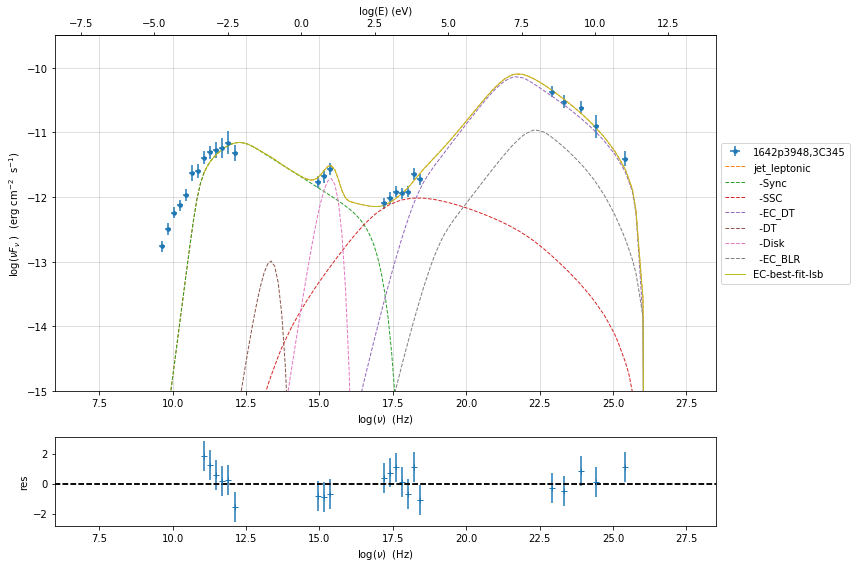

In [21]:
%matplotlib inline
fit_model_minuit.set_nu_grid(1E6,1E30,200)
fit_model_minuit.eval()
p2=fit_model_minuit.plot_model(sed_data=sed_data)
p2.rescale(y_min=-15,y_max=-9.5,x_min=6,x_max=28.5)

In [22]:
jet_minuti.energetic_report()

-----------------------------------------------------------------------------------------
jet eneregetic report:
     name                   type               units        val     
-------------- ----------------------------- --------- -------------
           U_e Energy dens. blob rest. frame erg / cm3  7.257454e-03
      U_p_cold Energy dens. blob rest. frame erg / cm3  2.819493e-05
           U_B Energy dens. blob rest. frame erg / cm3  4.150905e-04
           U_p Energy dens. blob rest. frame erg / cm3  0.000000e+00
    U_p_target Energy dens. blob rest. frame erg / cm3 -7.733001e-44
       U_Synch Energy dens. blob rest. frame erg / cm3  1.309732e-04
   U_Synch_DRF Energy dens. disk rest. frame erg / cm3  3.546008e+01
        U_Disk Energy dens. blob rest. frame erg / cm3  1.316068e-04
         U_BLR Energy dens. blob rest. frame erg / cm3  7.014444e-04
          U_DT Energy dens. blob rest. frame erg / cm3  4.471427e-03
         U_CMB Energy dens. blob rest. frame erg / cm3  0.0

## MCMC 

In [17]:
from jetset.mcmc import McmcSampler
from jetset.minimizer import ModelMinimizer


In [18]:
model_minimizer_minuit = ModelMinimizer.load_model('EC_model_minimizer_minuit.pkl')


mcmc=McmcSampler(model_minimizer_minuit)

labels=['N','B','beam_obj','p_1','gamma_break']
model_name='jet_leptonic'
use_labels_dict={model_name:labels}

mcmc.run_sampler(nwalkers=128,burnin=10,steps=50,bound=5.0,bound_rel=True,threads=None,walker_start_bound=0.005,use_labels_dict=use_labels_dict)

mcmc run starting


100%|██████████| 50/50 [05:42<00:00,  6.86s/it]

mcmc run done, with 1 threads took 349.64 seconds


In [32]:
print(mcmc.acceptance_fraction)

0.58546875


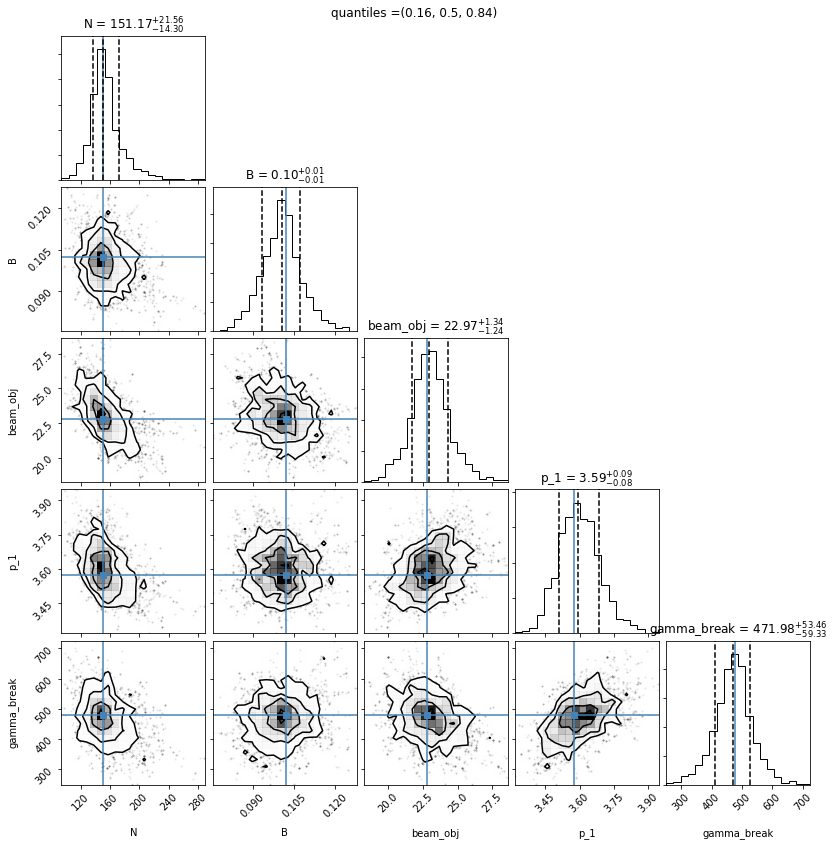

In [30]:
f=mcmc.corner_plot()

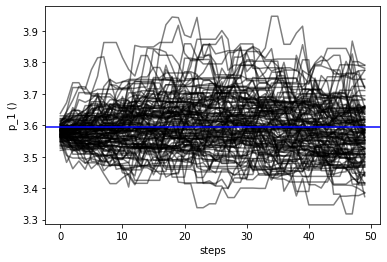

In [31]:
f=mcmc.plot_chain('p_1',log_plot=False)

## Save and resue MCMC

In [16]:
mcmc.save('mcmc_sampler.pkl')

NameError: name 'mcmc' is not defined

In [94]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
import jetset
from jetset.test_data_helper import  test_SEDs
from jetset.data_loader import ObsData,Data
from jetset.plot_sedfit import PlotSED
from jetset.test_data_helper import  test_SEDs
print(test_SEDs[1])
data=Data.from_file(test_SEDs[1])
sed_data=ObsData(data_table=data)
sed_data.group_data(bin_width=0.2)

sed_data.add_systematics(0.1,[10.**6,10.**29])
#p=sed_data.plot_sed()

from jetset.mcmc import McmcSampler
from jetset.minimizer import ModelMinimizer



ms=McmcSampler.load('mcmc_sampler.pkl')

/Users/orion/anaconda3/envs/jetset/lib/python3.7/site-packages/jetset-1.1.2-py3.7-macosx-10.9-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk421_EBL_DEABS.ecsv

***  binning data  ***
---> N bins= 89
---> bin_widht= 0.2



In [95]:
ms.model.name

'SSC-best-fit-minuit'

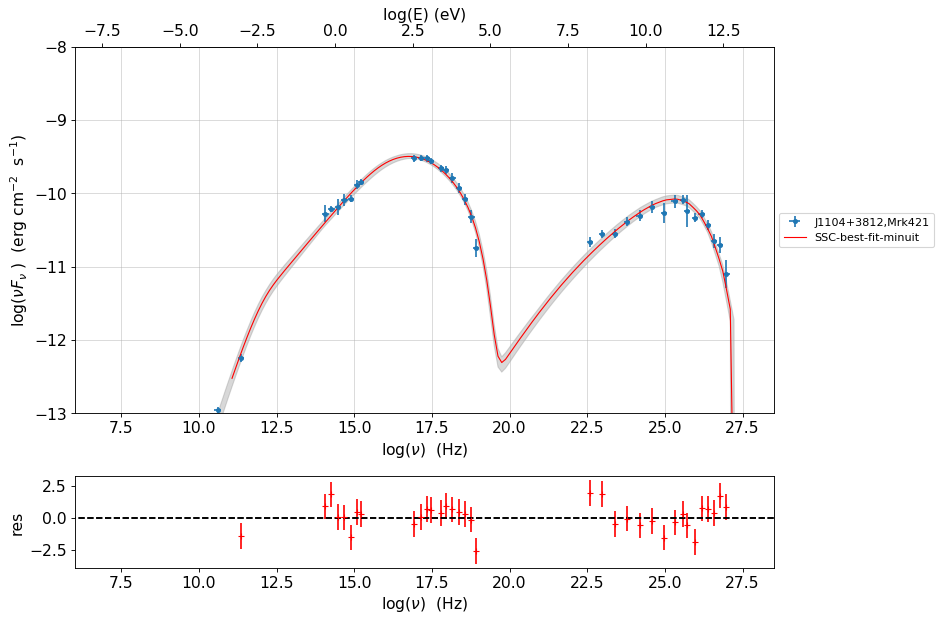

In [96]:
p=ms.plot_model(sed_data=sed_data,fit_range=[11., 27.4],size=50)
p.rescale(y_min=-13,x_min=6,x_max=28.5)

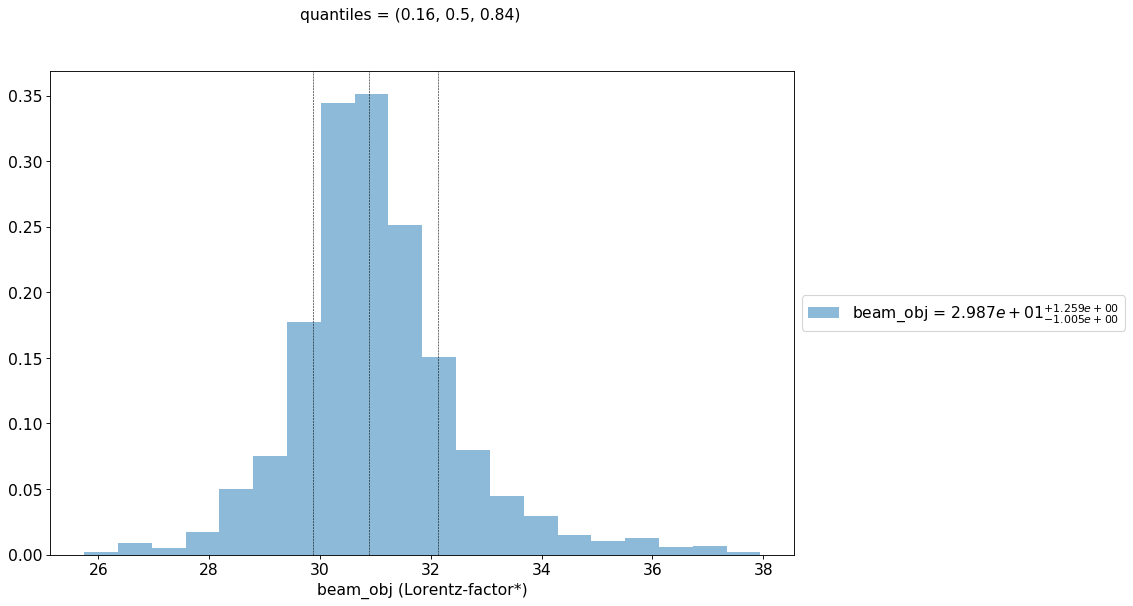

In [97]:
f=ms.plot_par('beam_obj',log_plot=False)
